In [5]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline




df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\DP\modernDP\data\liver.csv')
df.shape

(1700, 11)

In [6]:
df.columns

Index(['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'Diagnosis'],
      dtype='object')

In [7]:
df.head

<bound method NDFrame.head of       Age  Gender        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
0      58       0  35.857584           17.272828        0            1   
1      71       1  30.732470            2.201266        0            1   
2      48       0  19.971407           18.500944        0            0   
3      34       1  16.615417           12.632870        0            0   
4      62       1  16.065830            1.087815        0            1   
...   ...     ...        ...                 ...      ...          ...   
1695   42       0  38.498295           14.384688        0            1   
1696   40       0  27.600094            5.431009        0            0   
1697   38       0  38.730017            6.324302        1            2   
1698   67       0  35.820798           16.899417        0            2   
1699   80       0  24.060783            9.526447        0            0   

      PhysicalActivity  Diabetes  Hypertension  LiverFunctionTest  Diagnosis  
0 

In [8]:
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

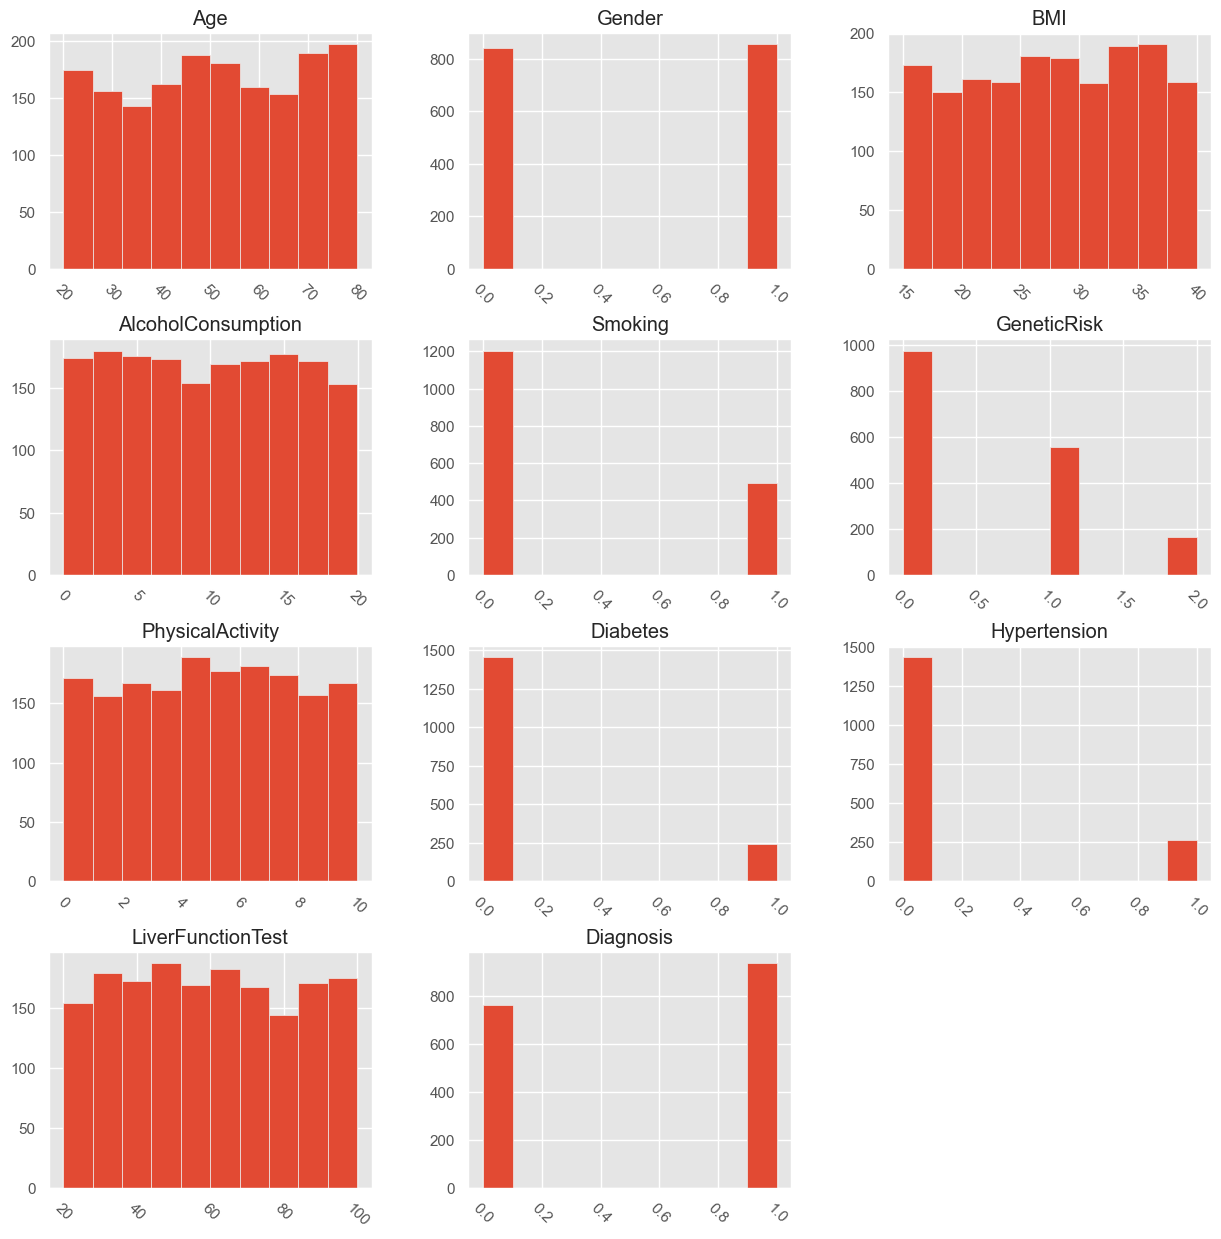

In [9]:
df.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show()

In [10]:
df.describe()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


In [33]:
#if score == negative , mark 0  , else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Diagnosis'] = df['Diagnosis'].map(partition).astype('object')
df.describe(include=['object'])

,Diagnosis
count,1700
unique,1
top,1
freq,1700


<Axes: xlabel='count', ylabel='Gender'>

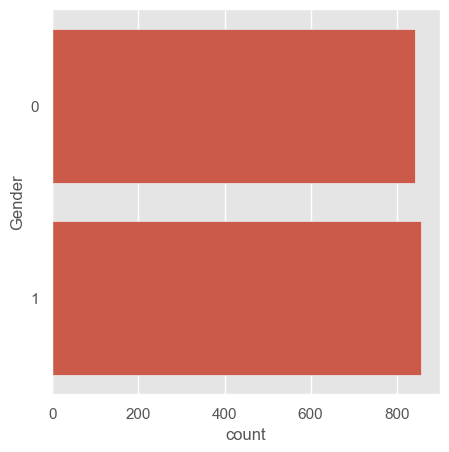

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [37]:
df[df['Gender'] == 'Male'][['Diagnosis', 'Gender']].head()

,Diagnosis,Gender


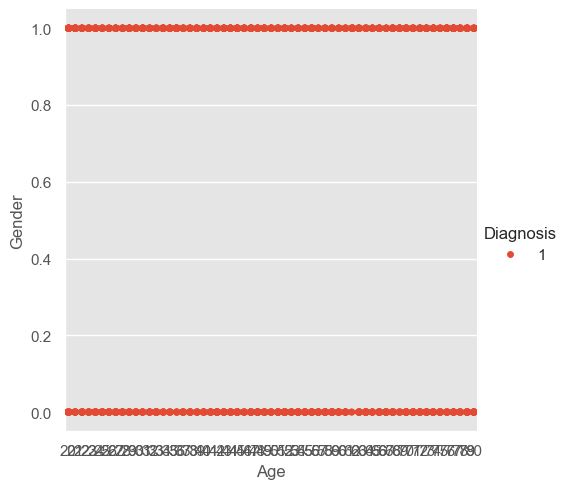

In [41]:
sns.catplot (x="Age", y="Gender", hue="Diagnosis", data=df, kind="strip");